# Visualizing Stock Data With Candlestick Charts

In [ ]:
!pip install mpl_finance
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import pandas_datareader as pdr
import datetime as dt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from scipy import stats
from scipy.stats import norm, skew

plt.style.use('fivethirtyeight')
%matplotlib inline 

In [4]:
share_name = "AAPL"

In [5]:
start = dt.datetime(2021, 9, 15)
end = dt.datetime.today()
#start, end

In [6]:
# load data
df = web.DataReader(share_name, 'stooq', start, end)
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-09-21,142.894,143.562,141.748,142.396,7.638540e+07
2021-09-20,142.764,143.801,140.242,141.908,1.243768e+08
2021-09-17,147.739,147.739,144.709,145.007,1.308132e+08
2021-09-16,147.361,147.889,146.155,147.709,6.852887e+07
2021-09-15,147.480,148.358,145.317,147.949,8.388691e+07


In [7]:
df = df[['Open', 'High', 'Low', 'Close']]
df.reset_index(inplace=True)
df.tail()

,Date,Open,High,Low,Close
328,2021-09-21,142.894,143.562,141.748,142.396
329,2021-09-20,142.764,143.801,140.242,141.908
330,2021-09-17,147.739,147.739,144.709,145.007
331,2021-09-16,147.361,147.889,146.155,147.709
332,2021-09-15,147.480,148.358,145.317,147.949


In [8]:
#df['Date'] = pd.DatetimeIndex(df['Date']).to_julian_date()
df['Date'] = df.Date.map(mdates.date2num)
df.tail()

,Date,Open,High,Low,Close
328,738054.0,142.894,143.562,141.748,142.396
329,738053.0,142.764,143.801,140.242,141.908
330,738050.0,147.739,147.739,144.709,145.007
331,738049.0,147.361,147.889,146.155,147.709
332,738048.0,147.480,148.358,145.317,147.949


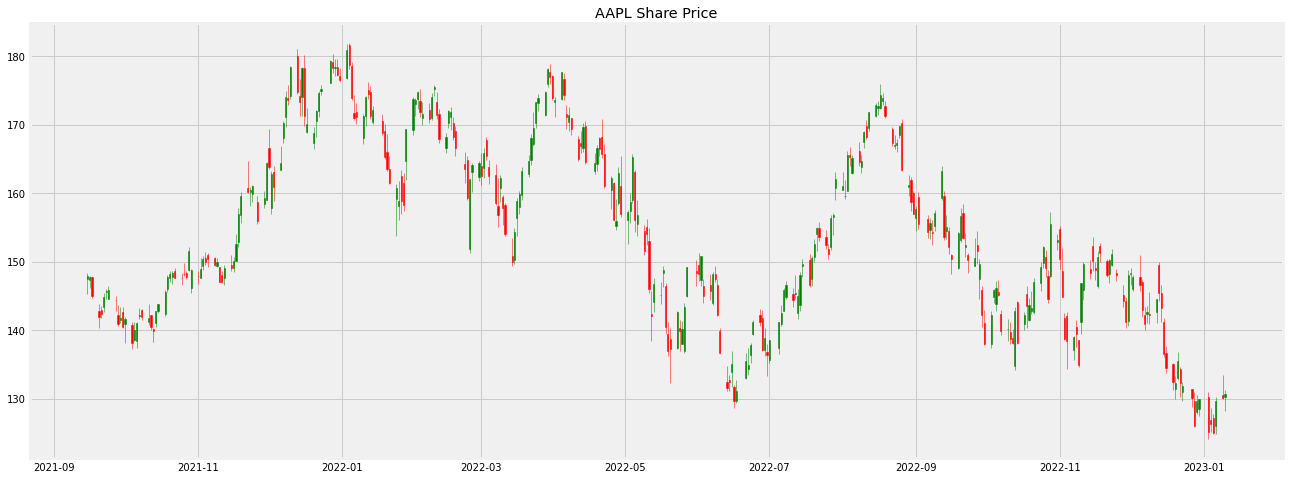

In [9]:
plt.figure(figsize=(20, 8))
ax = plt.subplot();
ax.grid(True);
#ax.set_axisbelow(True);
#ax.set_facecolor('black');
#ax.figure.set_facecolor('green');
#ax.tick_params(axis='x', colors='white');
#ax.tick_params(axis='y', colors='white');
ax.xaxis_date();
ax.set_title(f"{share_name} Share Price")

candlestick_ohlc(ax, df.values, width=0.5, colorup='g');